In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler,RobustScaler
from ast import And
from yellowbrick.cluster import KElbowVisualizer
import geopandas as gpd
import warnings
warnings.filterwarnings("ignore")
import datetime as dt
from IPython.display import display, HTML


from google.colab import drive # para cargar dataset
drive.mount("/content/drive")
data_path = "/content/drive/MyDrive/Datasets/E-Commerce/"

geolocation_df= pd.read_csv(data_path + 'olist_geolocation_dataset.csv')


Mounted at /content/drive


In [29]:
def calculate_distance(centroid, X, Y):
    distances = []

    # Unpack the x and y coordinates of the centroid
    c_x, c_y = centroid

    # Iterate over the data points and calculate the distance using the # given formula
    for x, y in list(zip(X, Y)):
        root_diff_x = (x - c_x) ** 2
        root_diff_y = (y - c_y) ** 2
        distance = np.sqrt(root_diff_x + root_diff_y)
        distances.append(distance)

    return distances

In [30]:

#geolocation_df.head()
geolocation_df = geolocation_df[['geolocation_lat','geolocation_lng']]
geolocation_df.head()


,geolocation_lat,geolocation_lng
0,-23.545621,-46.639292
1,-23.546081,-46.644820
2,-23.546129,-46.642951
3,-23.544392,-46.639499
4,-23.541578,-46.641607


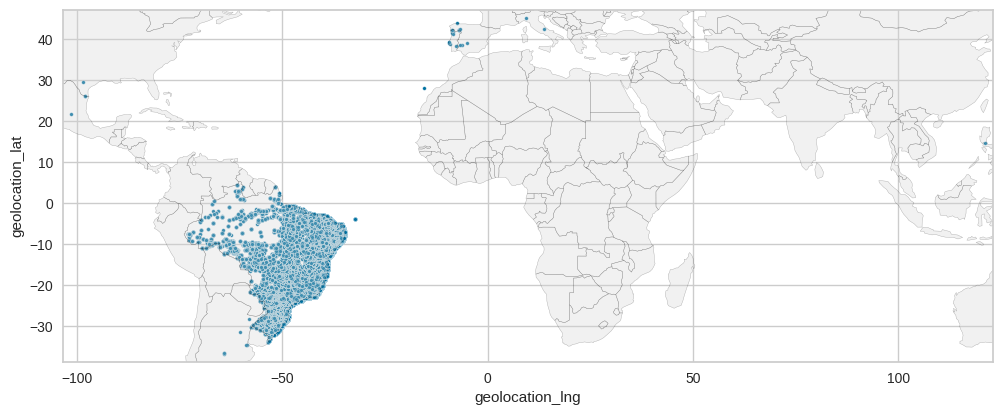

In [31]:
# Crear una figura más grande para el gráfico
plt.figure(figsize=(12, 8))

# Crear el gráfico de dispersión con seaborn
ax = sns.scatterplot(x="geolocation_lng", y="geolocation_lat", data=geolocation_df, s=7)

# Cargar el shapefile con geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Plotear el mapa mundial
world.plot(ax=ax, color='lightgray', edgecolor='black', alpha=0.3)

# Ajustar los límites del mapa para enfocarse en el área de los puntos
ax.set_xlim(geolocation_df['geolocation_lng'].min() - 2, geolocation_df['geolocation_lng'].max() + 2)
ax.set_ylim(geolocation_df['geolocation_lat'].min() - 2, geolocation_df['geolocation_lat'].max() + 2)

# Mostrar el gráfico de dispersión con el mapa de fondo
plt.show()


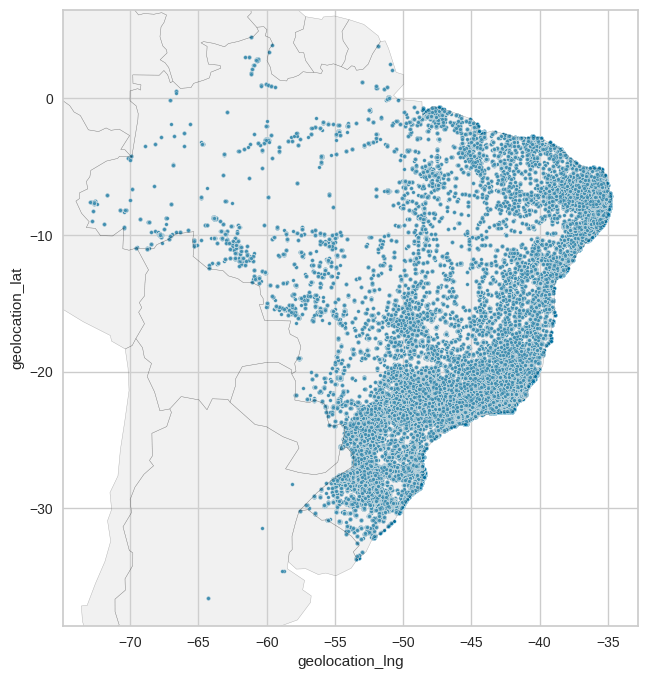

In [32]:
# Disminuyo el tamaño de Interes
geolocation_df = geolocation_df.loc[(geolocation_df['geolocation_lng']<-33) & (geolocation_df['geolocation_lat']<10)]

# Crear una figura más grande para el gráfico
plt.figure(figsize=(12, 8))

# Crear el gráfico de dispersión con seaborn
ax = sns.scatterplot(x="geolocation_lng", y="geolocation_lat", data=geolocation_df, s=7)

# Cargar el shapefile con geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Plotear el mapa mundial
world.plot(ax=ax, color='lightgray', edgecolor='black', alpha=0.3)

# Ajustar los límites del mapa para enfocarse en el área de los puntos
ax.set_xlim(geolocation_df['geolocation_lng'].min() - 2, geolocation_df['geolocation_lng'].max() + 2)
ax.set_ylim(geolocation_df['geolocation_lat'].min() - 2, geolocation_df['geolocation_lat'].max() + 2)

# Mostrar el gráfico de dispersión con el mapa de fondo
plt.show()


In [33]:
# No tiene sentido ejecutarla todas las veces

'''
k_means = KMeans()
elbow = KElbowVisualizer(k_means, k=(2, 20))
elbow.fit(geolocation_df)
k_value = elbow.elbow_value_
elbow.show()
'''

'\nk_means = KMeans()\nelbow = KElbowVisualizer(k_means, k=(2, 20))\nelbow.fit(geolocation_df)\nk_value = elbow.elbow_value_\nelbow.show()\n'

In [34]:
# Se asigna valor previamente calculado

k_value = 7

Kmean = KMeans(n_clusters=k_value)
Kmean.fit(geolocation_df)

KMeans(n_clusters=7)

In [35]:
print(Kmean.labels_)

[1 1 1 ... 6 6 6]


In [36]:
#Asigna los Centroides x,y a las variables c1, c2, cn

# Obtener el número de puntos
num_points = len(Kmean.cluster_centers_)

# Crear una lista para almacenar los puntos formateados
formatted_points = []

# Iterar a través de los puntos y formatearlos
for i in range(num_points):
    formatted_point = f'c{i+1} = ({Kmean.cluster_centers_[i][1]:.8f},{Kmean.cluster_centers_[i][0]:.8f})'
    formatted_points.append(formatted_point)

# Ejecutar las variables para que estén disponibles en el entorno
for point in formatted_points:
    exec(point)   # con este generamos la Variable
    #print(point)

# Genero centroid_names
centroid_names = []

for i in range(k_value):
    centroid_names.append(formatted_points[i].split('=')[0].strip())

# Crear un bucle for para calcular las distancias y agregar las columnas al dataframe
for centroid_name in centroid_names:
    column_name = f'{centroid_name}_Distance'
    geolocation_df[column_name] = calculate_distance(eval(centroid_name.lower()), geolocation_df['geolocation_lng'], geolocation_df['geolocation_lat'])
    exec(f"geolocation_df['{column_name}'] = calculate_distance({centroid_name.lower()}, geolocation_df['geolocation_lng'], geolocation_df['geolocation_lat'])")
    #print(f"geolocation_df['{column_name}'] = calculate_distance({centroid_name.lower()}, geolocation_df['geolocation_lng'], geolocation_df['geolocation_lat'])")

# Le agrego una "C" a los Id de Centroide
geolocation_df['Cluster'] = ['C' + str(x) for x in Kmean.labels_]
geolocation_df.head()


,geolocation_lat,geolocation_lng,c1_Distance,c2_Distance,c3_Distance,c4_Distance,c5_Distance,c6_Distance,c7_Distance,Cluster
0,-23.545621,-46.639292,19.578324,0.354032,5.846983,4.161741,18.268882,16.487849,5.851104,C1
1,-23.546081,-46.644820,19.578781,0.350970,5.844512,4.166636,18.265357,16.491181,5.846586,C1
2,-23.546129,-46.642951,19.578830,0.352158,5.845520,4.165091,18.266694,16.490227,5.847982,C1
3,-23.544392,-46.639499,19.577095,0.352943,5.845824,4.161249,18.267857,16.486919,5.851739,C1
4,-23.541578,-46.641607,19.574279,0.349429,5.842325,4.161497,18.264370,16.485659,5.851948,C1


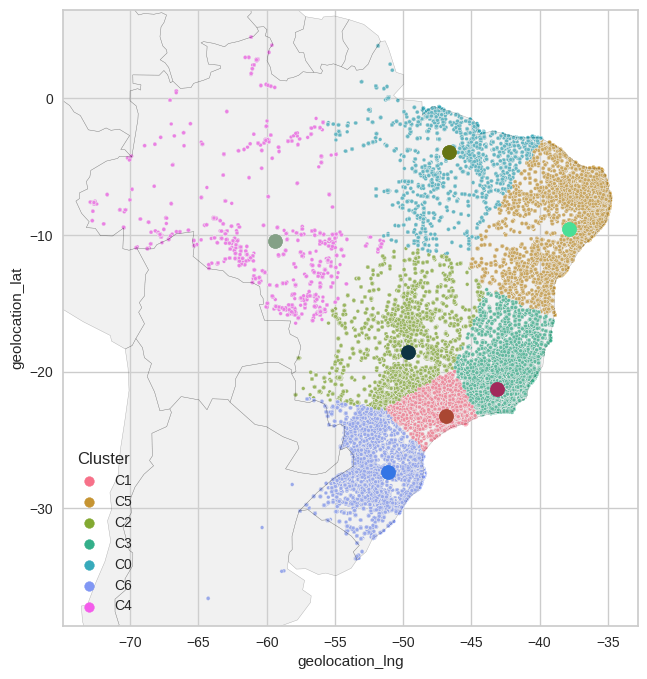

In [37]:

# Crear una figura más grande para el gráfico
plt.figure(figsize=(12, 8))

# Crear el gráfico de dispersión con seaborn
ax = sns.scatterplot(x="geolocation_lng", y="geolocation_lat", data=geolocation_df, hue="Cluster", s=7)

# Cargar el shapefile con geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Plotear el mapa mundial
world.plot(ax=ax, color='lightgray', edgecolor='black', alpha=0.3)

# Ajustar los límites del mapa para enfocarse en el área de los puntos
ax.set_xlim(geolocation_df['geolocation_lng'].min() - 2, geolocation_df['geolocation_lng'].max() + 2)
ax.set_ylim(geolocation_df['geolocation_lat'].min() - 2, geolocation_df['geolocation_lat'].max() + 2)

# Lista de colores aleatorios en formato hexadecimal
colors = [f'#{"".join([hex(int(np.random.rand()*16))[2:] for _ in range(6)])}' for _ in range(7)]

# Crear un bucle for para calcular las distancias y agregar las columnas al dataframe
for centroid_name, color in zip(centroid_names, colors):
    plt.scatter(eval(centroid_name.lower())[0], eval(centroid_name.lower())[1], marker='o', s=100, c=color)
    exec(f"plt.scatter({centroid_name.lower()}[0], {centroid_name.lower()}[1], marker='o', s=100, c='{color}')")
    #print(f"plt.scatter({centroid_name.lower()}[0], {centroid_name.lower()}[1], marker='o', s=100, c='{color}')")

plt.show()
